## Using my new THREDDS Class script!

There are still so many things to consider to make this a working example, but it has passed the simple tests

---

Some notes to consider:

* Make dictionary for plotting arguments for each variable?

    1) Like for MSLP, certain number of levels, gaussian filtered, etc.
    
    2) Certain colorbars for specific variables
    
    .
    
    .
    
    .


* Or should there be individual methods for each type of variable, ex. make a mslp(), vorticity()...

    1) This could also incorporate being able to plot other variables on top if desired, like adding Hi/Lo's to MSLP or vorticity?
    
    2) There would need to be a check for the specific variables in each model product??
    

* Make sure each time step is appropriate for the variables
    Right now the time steps are based off forecast hour steps of specific model, but some variables with in the     models and products might vary...
    
    1) Ex: GFS and NAM have time step in incriments of 3 hours and RAP 1 hour. But any precip is usually ```X``` amount of hours behind...

In [4]:
import THREDDS_Class_Example as TD
import numpy as np

In [ ]:
TD.THREDDS_Models.model_dict

In [5]:
thredds = TD.THREDDS_Models()

9 2020 2


In [6]:
thredds.im_save_path

'./'

The ```.get_var_info``` will bring up the NCSS Site with all available variables

In [8]:
thredds.get_var_info?

Signature: thredds.get_var_info(model, prod)
Docstring:
Reference for specific variable names needed for queue.

Opens new browser tab with NCSS variables for desired model and product
-----------------------------------------------------------------------

See model_dict() method for help

Ex args:
    Model -> RAP (Rapid Refresh)
    Product -> 13km (13km CONUS)
File:      ~/Documents/GitHub/Python-Jupyter/classes/THREDDS_Class_Example.py
Type:      method


In [7]:
model_name = "RAP"
prod_name = "13km"

In [ ]:
thredds.get_var_info(model_name,prod_name)

In [9]:
thredds.get_model_data?

Signature: thredds.get_model_data(init_hour, model, prod, *argv)
Docstring:
Queue data from given datasets
------------------------------

Returns:
    * Data
    * String value for model name
    * String value for use in plot title
File:      ~/Documents/GitHub/Python-Jupyter/classes/THREDDS_Class_Example.py
Type:      method


In [11]:
thredds.change_run_time(2020,2,8)

8 2020 2


In [13]:
data,model,title_prod = thredds.get_model_data("1200",model_name,prod_name,
                                               "MSLP_MAPS_System_Reduction_msl")


MSLP_MAPS_System_Reduction_msl
2020-02-08 12:00:00
Data grab complete!


In [14]:
mslp = data["MSLP_MAPS_System_Reduction_msl"][:]/100

In [15]:
data

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Originating_or_generating_Center: US National Weather Service, National Centres for Environmental Prediction (NCEP)
    Originating_or_generating_Subcenter: 0
    GRIB_table_version: 2,1
    Type_of_generating_process: Forecast
    Analysis_or_forecast_generating_process_identifier_defined_by_originating_centre: Rapid Refresh (RAP)
    Conventions: CF-1.6
    history: Read using CDM IOSP GribCollection v3
    featureType: GRID
    History: Translated to CF-1.0 Conventions by Netcdf-Java CDM (CFGridWriter2)
Original Dataset = /data/ldm/pub/native/grid/NCEP/RR/CONUS_13km/RR_CONUS_13km_20200208_1200.grib2.ncx3#LambertConformal_337X451-40p01N-98p14W; Translation Date = 2020-02-09T03:16:23.049Z
    geospatial_lat_min: 20.563028851179443
    geospatial_lat_max: 55.51675688158025
    geospatial_lon_min: -139.9699067110668
    geospatial_lon_max: -57.26853740515435
    dimensions(sizes): time(22), y(300),

In [16]:
data.geospatial_lat_min,data.geospatial_lat_max,data.geospatial_lon_min,data.geospatial_lon_max

(20.563028851179443, 55.51675688158025, -139.9699067110668, -57.26853740515435)

In [17]:
lats = data["lat"][:]
lons = data["lon"][:]

In [18]:
thredds.change_map_attrs?

Signature: thredds.change_map_attrs(extent, cmap=None, clevs=None, colors=None)
Docstring: <no docstring>
File:      ~/Documents/GitHub/Python-Jupyter/classes/THREDDS_Class_Example.py
Type:      method


In [19]:
thredds.change_map_attrs(thredds.extent,clevs=15,colors='r')

In [20]:
# Set the font 
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 18,
        }

In [21]:
thredds.get_time?

Signature: thredds.get_time(data)
Docstring:
*! Need to run the get_model_data() method first !*

Grabs actual time stamps for data

Returns: time_strings,time_var,time_final 
File:      ~/Documents/GitHub/Python-Jupyter/classes/THREDDS_Class_Example.py
Type:      method


In [22]:
time_var = thredds.get_time(data)
filename_var = "MSLP"
variable = data["MSLP_MAPS_System_Reduction_msl"].Grib2_Parameter_Name

In [23]:
thredds.change_im_save_path("/Users/chowdahead/Desktop/")

In [24]:
thredds.im_save_path

'/Users/chowdahead/Desktop/'

In [25]:
thredds.make_map?

Signature:
thredds.make_map(
    data,
    time_index,
    lats,
    lons,
    time_strings,
    time_final,
    font,
    model,
    variable,
    title_prod,
    filename_var,
    contourfill=True,
    cmap=None,
)
Docstring:
Plotting method for the THREDDS model data!
-------------------------------------------

Arguments:
    * data - variable data to plot ie mslp
    * time_index - time step index for variable ie 0,1,2, etc.
    * lats/lons - latitude and longitude variable from dataset
    * time_strings - ...
    * time_final - ...
    * font - dictionary fo font attributes for plots and labels
    * model - string name of weather model, used for title and filename
    * variable - string name of variable plotting, used for title
    * title_prod - string value of dataset long name of variable
    * filename_var - string value for variable used for filename
    * contour_fill - plots filled contours when assigned True
    * cmap - provides colormap when not None
    
-----------

12


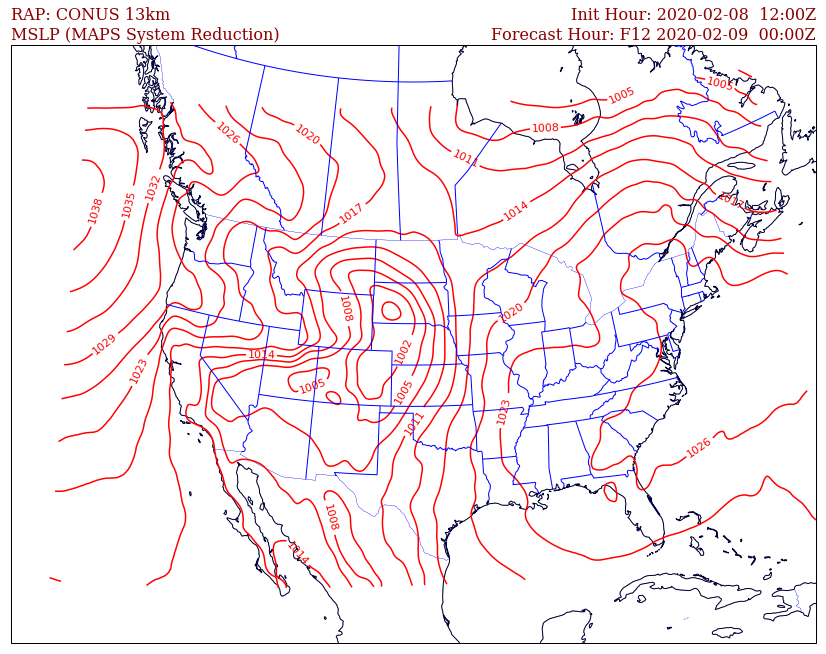

In [27]:
thredds.make_map(mslp,12,lats,lons,time_var[0],time_var[-1],font,
                 model,variable,title_prod,filename_var,contourfill=False)

---
### Change model and product 

In [28]:
model_name = "GFS"
prod_name = "CONUS_20km"

In [29]:
data,model,title_prod = thredds.get_model_data("1200",model_name,prod_name,
                                               "MSLP_Eta_model_reduction_msl")

MSLP_Eta_model_reduction_msl
2020-02-08 12:00:00
Data grab complete!


In [30]:
mslp = data["MSLP_Eta_model_reduction_msl"][:]/100

In [31]:
lats = data["lat"][:]
lons = data["lon"][:]

In [32]:
time_var = thredds.get_time(data)
filename_var = "MSLP"
variable = data["MSLP_Eta_model_reduction_msl"].Grib2_Parameter_Name

12


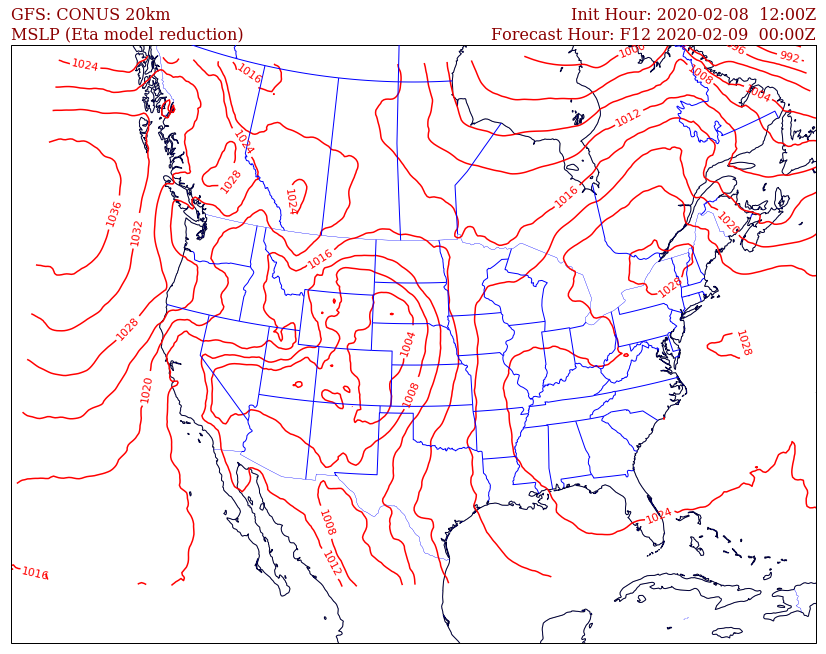

In [33]:
thredds.make_map(mslp,4,lats,lons,time_var[0],time_var[-1],font,
                 model,variable,title_prod,filename_var,contourfill=False)

In [34]:
cd ~/Downloads/

/Users/chowdahead/Downloads


In [35]:
import Vorticity_Color_Bar as VORT

In [36]:
vort_cmap = VORT.my_cmap
vort_levs = VORT.vort_levels

In [37]:
model_name = "GFS"
prod_name = "CONUS_20km"

In [38]:
var = "Absolute_vorticity_isobaric"

In [39]:
data,model,title_prod = thredds.get_model_data("1200",model_name,prod_name,
                                               var)
model,title_prod

Absolute_vorticity_isobaric
2020-02-08 12:00:00
Data grab complete!


('GFS', 'CONUS_20km')

In [40]:
vort = data[var][:]
lats = data["lat"][:]
lons = data["lon"][:]

In [41]:
time_var = thredds.get_time(data)
filename_var = "Vort"
variable = data[var].Grib2_Parameter_Name

In [42]:
thredds.change_map_attrs(thredds.extent,clevs=vort_levs,colors=None)

12


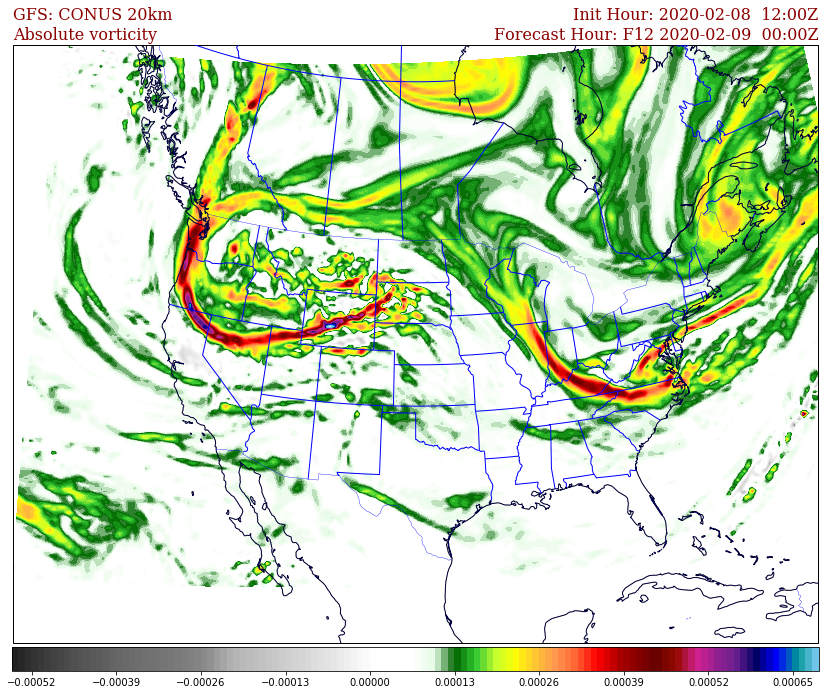

In [44]:
thredds.make_map(vort,4,lats,lons,time_var[0],time_var[-1],
                 font,model,variable,title_prod,filename_var,contourfill=True,
                cmap=vort_cmap)